In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load train and test data

train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#how many misssing values in train data

print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Data Cleaning

In [10]:
# impute missing numeric values with column mean; in train data
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [11]:
# impute missing numeric values with column mean; in test data
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [12]:
# Cabin and Ticket are alphanumeric values; we wud discard later
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

## Exploratory analysis

See survival count with respect to individual features

In [13]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [17]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Comparing features with those who survived 1/Not survived 0

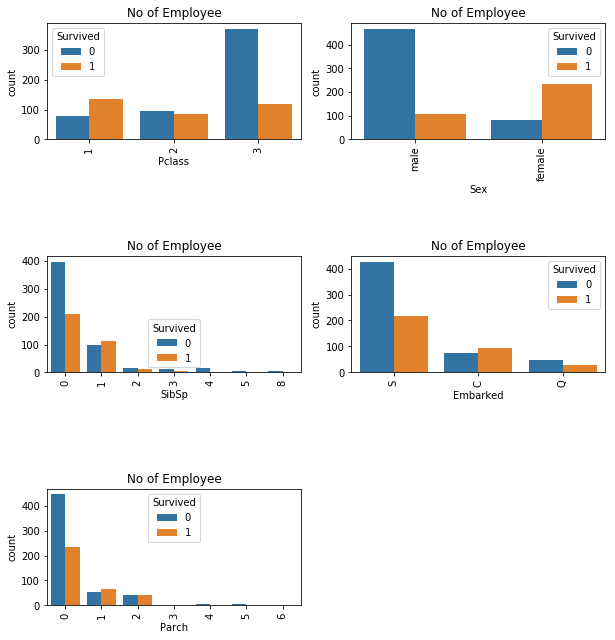

In [18]:

features= ['Pclass', 'Sex',
           'SibSp','Embarked', 'Parch',]
fig= plt.subplots(figsize= (10,15))

for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=train , hue= "Survived")
    plt.xticks(rotation= 90)
    plt.title("No of Employee")

## Data pre-processing 

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
# from experience; features like Name, Ticket, Cabin, Embarked arent significant

train = train.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)
test = test.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)

In [21]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [22]:
test.keys()

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

So we have 6 features remaining, passengerID n survived excluded

In [23]:
#Label Encoding; Sex d only feature that is non-numeric

le= LabelEncoder()
le.fit(train['Sex'])
le.fit(test['Sex'])

train['Sex']=le.transform(train['Sex'])
test['Sex']=le.transform(test['Sex'])

In [24]:
# confirm transformation
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [25]:
#keep this both
id_column= train.iloc[:, 0:1].copy()

y=np.array(train['Survived'])

In [26]:
train=train.drop(['PassengerId', 'Survived'], axis=1)

In [27]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [28]:
#to array
x_nump = np.array(train.astype(float)) 

In [29]:
x_nump

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         7.25      ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
        71.2833    ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         7.925     ],
       ...,
       [ 3.        ,  0.        , 29.69911765,  1.        ,  2.        ,
        23.45      ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ,
        30.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ,  0.        ,
         7.75      ]])

In [30]:
#rescale

scaler= MinMaxScaler()
x_scaled = scaler.fit_transform(x_nump)


In [31]:
x_scaled

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.01546857],
       ...,
       [1.        , 0.        , 0.36792055, 0.125     , 0.33333333,
        0.04577135],
       [0.        , 1.        , 0.32143755, 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 0.39683338, 0.        , 0.        ,
        0.01512699]])

In [32]:
#back pd data frame
x= pd.DataFrame(x_scaled, columns=['Pclass','Sex','Age','SibSp','Parch','Fare'] )

In [33]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,1.0,0.271174,0.125,0.0,0.014151
1,0.0,0.0,0.472229,0.125,0.0,0.139136
2,1.0,0.0,0.321438,0.000,0.0,0.015469
3,0.0,0.0,0.434531,0.125,0.0,0.103644
4,1.0,1.0,0.434531,0.000,0.0,0.015713


In [34]:
#u can use rescale version for any purpose but it doesnt help kmeans
# visualization, understanding patterns or detecting outlier

#so we use original
x=train.copy()
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [35]:

#build kmeans model
kmeans = KMeans(n_clusters = 2, max_iter=600, algorithm= 'auto') # creating 2 clusters
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
#test performance
#code works for x in numpy array
x_nump= np.array(train.astype(float)) 

correct = 0
for i in range(len(x_nump)):
    predict_me = np.array(x_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    
    if prediction[0] == y[i]:
        correct +=1
        
        
print(float(correct)/len(x_nump))

0.3838383838383838


In [37]:
# visualizing the clustering
#code works for x in pandas

x['cluster']=kmeans.fit_predict(x)

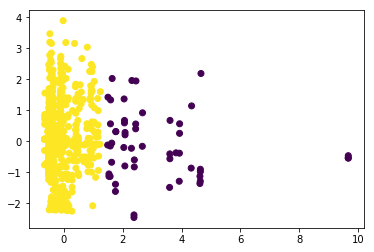

In [38]:
#principal component analysis
from sklearn.decomposition import PCA

pca=PCA(n_components=2,whiten=True)
pca.fit(x)
x['x']=pca.fit_transform(x)[:,0]
x['y']=pca.fit_transform(x)[:,1]
plt.scatter(x['x'],x['y'],c=x['cluster'])
plt.show()

In [39]:
x.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,cluster,x,y
886,2,1,27.000000,0,0,13.00,1,-0.387576,-0.168344
887,1,0,19.000000,0,0,30.00,1,-0.049653,-0.818293
888,3,0,29.699118,1,2,23.45,1,-0.175993,0.013874
889,1,1,26.000000,0,0,30.00,1,-0.046070,-0.277879
890,3,1,32.000000,0,0,7.75,1,-0.490745,0.226491


In [40]:
x['cluster'].value_counts()

#shows no pple in each groupings;

1    838
0     53
Name: cluster, dtype: int64

No cluster is specific to survived/Not_survived, its their 
attributes tha matters


In [41]:
np.round(x.groupby('cluster').mean(),2)

# One group were mostly upper class(1), females, had families 
# and paid more fare (we knw its survival group since wev seen d target)

,Pclass,Sex,Age,SibSp,Parch,Fare,x,y
cluster,,,,,,,,
0,1.00,0.36,31.74,0.66,0.89,187.03,3.11,-0.15
1,2.39,0.67,29.57,0.51,0.35,22.41,-0.20,0.01


In [42]:
#other group were middle/lower class, males, no families, younger,
# paid lesser fare (Not survived)